## UFO Sightings

Scrubbed dataset from: https://www.kaggle.com/NUFORC/ufo-sightings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap
import os
import subprocess
from IPython.display import Video

df = pd.read_csv("scrubbed.csv", low_memory=False, index_col="datetime")
df

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...
9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444


In [2]:
df.index = pd.to_datetime(df.index.str.replace("24:00", "23:59"), format="%m/%d/%Y %H:%M")
df.sort_index(inplace=True)

In [3]:
df

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
datetime,,,,,,,,,,
1906-11-11 00:00:00,wien (austria),NaN,NaN,other,10800,3 h,The oldest professional photo of a UFO object ...,12/23/2002,48.208174,16.373819
1910-01-01 23:59:00,kirksville (near),mo,us,disk,120,minutes,Historical sighting (1903 - 1913) Northern Mis...,9/15/2005,40.1947222,-92.583056
1910-06-01 15:00:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,4/16/2005,32.7091667,-96.008056
1916-04-05 13:00:00,france (above; from aircraft),NaN,NaN,cigar,60,about 1 min.,((NUFORC Note: Possible hoax. PD)) Saw 3 ci...,3/9/2004,46.227638,2.213749
1920-06-11 21:00:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,5/12/2009,40.1238889,-86.013333
...,...,...,...,...,...,...,...,...,...,...
2014-05-07 21:10:00,naugatuck,ct,us,unknown,300,5 minutes,Large formation of lights in western sky&#44 f...,5/8/2014,41.4858333,-73.051111
2014-05-07 21:20:00,hillsboro,mo,us,fireball,360,4-6 minutes,Round slow moving silent ball looked like a ca...,5/8/2014,38.2322222,-90.562778
2014-05-07 23:30:00,san isidro,nm,NaN,unknown,15,15 seconds,2 red lights gliding across sky&#44 then green...,5/8/2014,35.563363,-106.770591


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80332 entries, 1906-11-11 00:00:00 to 2014-05-08 18:45:00
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  80332 non-null  object 
 1   state                 74535 non-null  object 
 2   country               70662 non-null  object 
 3   shape                 78400 non-null  object 
 4   duration (seconds)    80332 non-null  object 
 5   duration (hours/min)  80332 non-null  object 
 6   comments              80317 non-null  object 
 7   date posted           80332 non-null  object 
 8   latitude              80332 non-null  object 
 9   longitude             80332 non-null  float64
dtypes: float64(1), object(9)
memory usage: 6.7+ MB


some value in latitude which is not a number, if you search the data it appears to be a typo (33q.200088)

In [5]:
df.latitude = pd.to_numeric(df.latitude, errors="coerce")
df["duration (seconds)"] = pd.to_numeric(df["duration (seconds)"], errors="coerce")
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66516 entries, 1910-01-01 23:59:00 to 2014-05-08 00:00:00
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  66516 non-null  object 
 1   state                 66516 non-null  object 
 2   country               66516 non-null  object 
 3   shape                 66516 non-null  object 
 4   duration (seconds)    66516 non-null  float64
 5   duration (hours/min)  66516 non-null  object 
 6   comments              66516 non-null  object 
 7   date posted           66516 non-null  object 
 8   latitude              66516 non-null  float64
 9   longitude             66516 non-null  float64
dtypes: float64(3), object(7)
memory usage: 5.6+ MB


### What to do with data? Time series with points popping up and fading out out, point strength dependent on reported duration.

First narrow down data and plot all at once

In [6]:
df.columns

Index(['city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [ ]:
# "longitude " has a whitespace at end

In [7]:
df2 = df[["duration (seconds)", "latitude", "longitude "]].copy()
df2.columns = ["duration", "lat", "long"]
df2

,duration,lat,long
datetime,,,
1910-01-01 23:59:00,120.0,40.194722,-92.583056
1910-06-01 15:00:00,120.0,32.709167,-96.008056
1920-06-11 21:00:00,60.0,40.123889,-86.013333
1925-12-28 18:00:00,60.0,41.420833,-90.015000
1929-07-05 14:00:00,60.0,43.642500,-118.627500
...,...,...,...
2014-05-07 20:30:00,180.0,36.330278,-119.291111
2014-05-07 21:00:00,120.0,30.547500,-88.175278
2014-05-07 21:10:00,300.0,41.485833,-73.051111


In [8]:
df2.describe()

,duration,lat,long
count,6.651600e+04,66516.000000,66516.000000
mean,6.572997e+03,38.707097,-95.293158
std,5.108910e+05,5.844058,18.480976
min,1.000000e-02,-37.813938,-176.658056
25%,3.000000e+01,34.197500,-114.180556
50%,1.800000e+02,39.246111,-89.598750
75%,6.000000e+02,42.336944,-80.397500
max,8.280000e+07,72.700000,153.099533


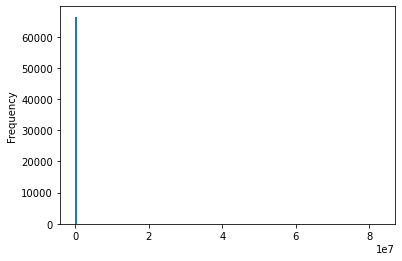

In [9]:
# highly skewed distrivution of durations
df2.duration.plot.hist(bins=200);

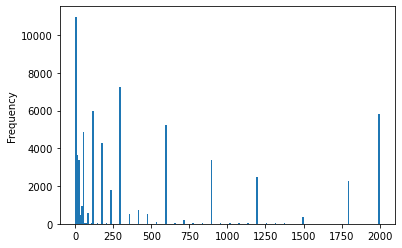

In [10]:
df2.duration = df2.duration.clip(1, 2000)
df2.duration.plot.hist(bins=200);

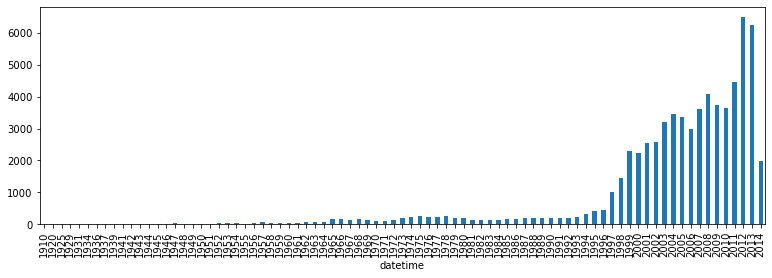

In [11]:
fig, ax = plt.subplots(figsize=(13,4))
df2.groupby(df2.index.to_series().dt.year).duration.count().plot.bar(ax=ax);

In [12]:
# 1965 appears to be the best "beginning"
df3 = df2.loc[df2.index >= "1965", :]
df3

,duration,lat,long
datetime,,,
1965-01-01 17:00:00,20.0,41.526111,-87.889167
1965-01-01 20:00:00,20.0,43.378333,-92.918611
1965-01-01 20:00:00,2000.0,35.088611,-92.441944
1965-02-15 17:00:00,2000.0,41.850000,-87.650000
1965-02-16 21:00:00,20.0,29.983889,-90.152778
...,...,...,...
2014-05-07 20:30:00,180.0,36.330278,-119.291111
2014-05-07 21:00:00,120.0,30.547500,-88.175278
2014-05-07 21:10:00,300.0,41.485833,-73.051111


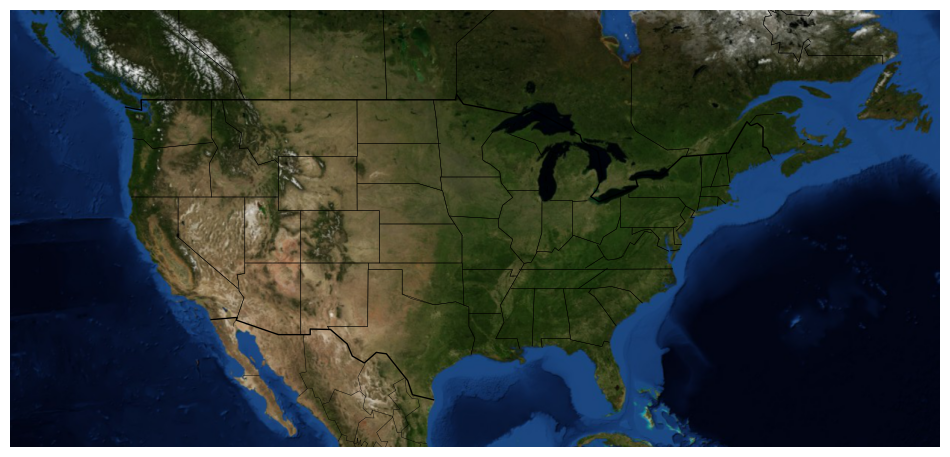

In [13]:
def get_basemap():
    fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
    ax.set_axis_off()
    m = Basemap(projection='mill', llcrnrlat=22, urcrnrlat=55, llcrnrlon=-135, urcrnrlon=-52, ax=ax)
    m.bluemarble()
    m.drawcountries(linewidth=1, linestyle='solid', color='k')
    m.drawstates(linewidth=0.3, linestyle='solid', color='k')
    return fig, m
get_basemap();

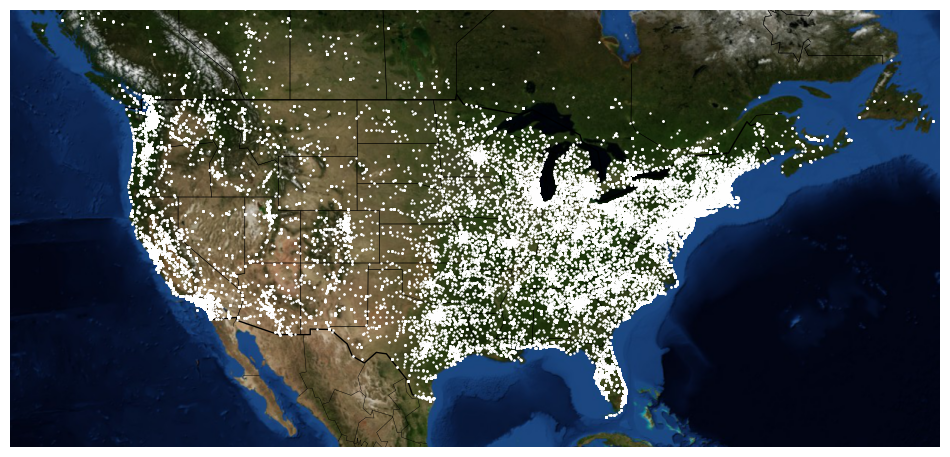

In [14]:
fig, m = get_basemap()
x, y = m(df3.long.to_numpy(), df3.lat.to_numpy())
m.scatter(x, y, s=0.5, zorder=3, color='white');

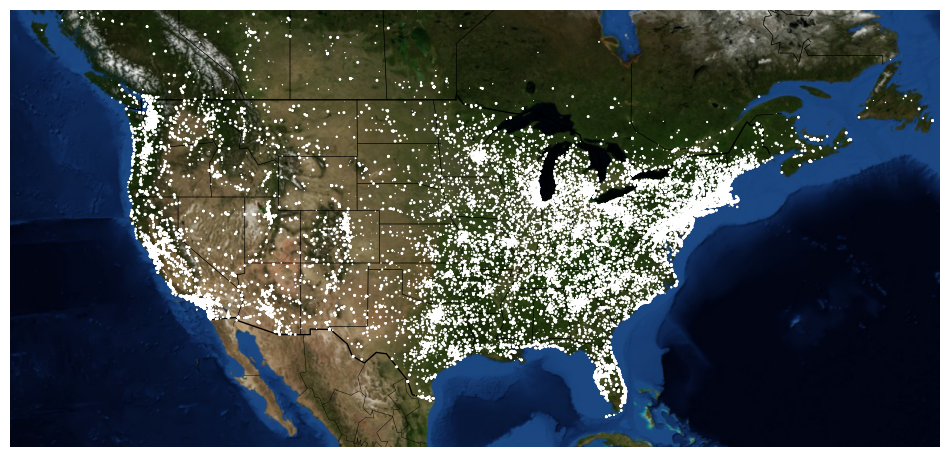

In [15]:
def get_size(duration):
    return 0.1 + 0.1 * np.sqrt(duration)

fig, m = get_basemap()
m.scatter(x, y, s=get_size(df3.duration), zorder=3, color='white', edgecolor="none");

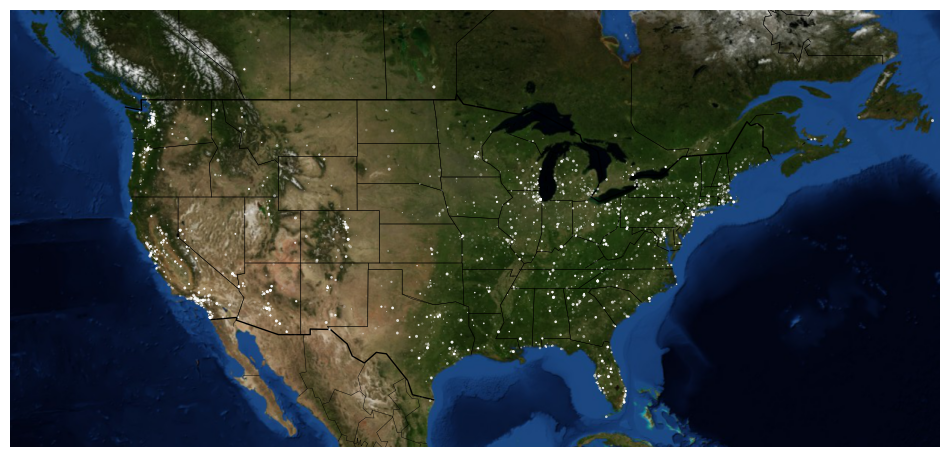

In [16]:
# more interesting if points fade away, cannot do that with alpha

def get_color(times, cur_time):
    nothing = (times <= cur_time).astype(int)
    decay = np.exp((times - cur_time).days.to_series().clip(-1000, 1000)/500)
    brightness =np.clip(1.1 * decay - 0.1, 0, 1) #so we don't have infinite fade
    colors = np.ones((times.size, 4)) # an array of white
    colors[:, 3] = brightness * nothing # the end column is transparency
    return colors

fig, m = get_basemap()
x, y = m(df3.long.to_numpy(), df3.lat.to_numpy())
colors = get_color(df3.index, pd.to_datetime('1999-04-01 22:30:00'))
m.scatter(x, y, s=get_size(df3.duration), zorder=3, color=colors, edgecolor="none");

In [17]:
dates = pd.date_range(df3.index.min(), df3.index.max(), 150)
os.makedirs("output_ufo", exist_ok=True)

for index, date in enumerate(dates):
    filename = f"output_ufo/{index:04d}.png"
    if not os.path.exists(filename):
        print(f"Plotting index {index} at {date}")
        fig, m = get_basemap()
        sx = fig.get_axes()[0]
        
        # Scatter plot
        x, y = m(df3.long.to_numpy(), df3.lat.to_numpy())
        colors = get_color(df3.index, date)
        m.scatter(x, y, s=get_size(df3.duration), zorder=3, c=colors, lw=0, edgecolor="none");
        
        #Year label
        label = f"UFO sightings in {date.year}"
        ax.text(0.01, 0.01, label, transform=ax.transAxes, fontsize=16)
        
        # Save it correctly with absolutely no margin.
        fig.subplots_adjust(bottom=0, top=1, left=0, right=1)
        fig.savefig(filename, bbox_inches="tight", pad_inches=0)
        plt.close(fig)

In [18]:
command = ("ffmpeg -r 30 -i output_ufo/%04d.png" + " -vcodec libx264 -pix_fmt yuv420p -crf 23 -y " + "ufo_sightings.mp4")
subprocess.run(command)

CompletedProcess(args='ffmpeg -r 30 -i output_ufo/%04d.png -vcodec libx264 -pix_fmt yuv420p -crf 23 -y ufo_sightings.mp4', returncode=0)

In [19]:
Video("ufo_sightings.mp4")